In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "TFM/code/entanglement_2x2/input_data/received_from_DM/mixed_states"

df1 = pd.read_csv(path+"/mixed_entangled.txt", sep='\s+', header = None)
df2 = pd.read_csv(path+"/mixed_separable.txt", sep='\s+', header = None)
df1["entangled"]= 1
df2["entangled"]= 0


In [3]:
df = pd.concat([df1, df2])
df = df.sample(frac=1, ignore_index=True, random_state=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,entangled
0,0.245802,0.0,-0.030823,-0.023831,0.382758,-0.181260,-0.065570,-0.014380,-0.030823,0.023831,...,-0.070746,-0.065570,0.014380,0.009616,0.004554,-0.091500,0.070746,0.018333,0.0,0
1,0.020670,0.0,-0.040674,-0.064515,0.031250,-0.003254,-0.071650,-0.091134,-0.040674,0.064515,...,-0.149063,-0.071650,0.091134,0.425434,0.044302,-0.093977,0.149063,0.650174,0.0,0
2,0.008397,0.0,-0.030964,-0.056298,-0.047925,-0.042794,0.001882,-0.008184,-0.030964,0.056298,...,0.056298,0.001882,0.008184,0.047925,-0.042794,0.030964,-0.056298,0.008397,0.0,1
3,0.018756,0.0,-0.000101,-0.030422,-0.065151,0.023854,0.039042,0.105548,-0.000101,0.030422,...,-0.416297,0.039042,-0.105548,-0.171409,-0.062759,-0.001382,0.416297,0.675245,0.0,0
4,0.422774,0.0,0.127692,-0.127844,-0.169581,-0.062382,0.383668,-0.177585,0.127692,0.127844,...,0.127844,0.383668,0.177585,0.169581,-0.062382,-0.127692,-0.127844,0.422774,0.0,1


In [5]:
import joblib
joblib.dump(df, "mixed.job")

['mixed.job']

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,entangled
count,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,0.248013,0.0,0.001867,-0.000295,0.000050,-0.000201,0.000875,0.001456,0.001867,0.000295,...,-0.000037,0.000875,-0.001456,0.000075,0.001390,0.001304,0.000037,0.249572,0.0,0.500000
std,0.226273,0.0,0.145258,0.147011,0.145714,0.145219,0.158063,0.159024,0.145258,0.147011,...,0.146949,0.158063,0.159024,0.146386,0.146581,0.145792,0.146949,0.226389,0.0,0.500013
min,0.000000,0.0,-0.496238,-0.499661,-0.497952,-0.497870,-0.499553,-0.498029,-0.496238,-0.489878,...,-0.496011,-0.499553,-0.499410,-0.494433,-0.492530,-0.497470,-0.486348,0.000000,0.0,0.000000
25%,0.052361,0.0,-0.086829,-0.089234,-0.088446,-0.088603,-0.069433,-0.070380,-0.086829,-0.088597,...,-0.087812,-0.069433,-0.073940,-0.091373,-0.086360,-0.086849,-0.089669,0.053559,0.0,0.000000
50%,0.197354,0.0,0.000121,-0.000004,0.000001,-0.000001,0.000197,0.000288,0.000121,0.000004,...,0.000005,0.000197,-0.000288,0.000000,0.000017,0.000063,-0.000005,0.198853,0.0,0.500000
75%,0.391840,0.0,0.089950,0.088597,0.089108,0.089943,0.072393,0.073940,0.089950,0.089234,...,0.089669,0.072393,0.070380,0.089716,0.090890,0.089873,0.087812,0.394987,0.0,1.000000
max,0.999958,0.0,0.493055,0.489878,0.494272,0.496895,0.499455,0.499410,0.493055,0.499661,...,0.486348,0.499455,0.498029,0.492176,0.497734,0.493338,0.496011,0.999808,0.0,1.000000


## Random Forest 
### Raw data

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier(random_state=1)

X = df.drop(columns="entangled")
y = df['entangled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)




In [8]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.99925

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.99975, 0.99975, 0.9995 , 0.99875, 0.99925])

<AxesSubplot:>

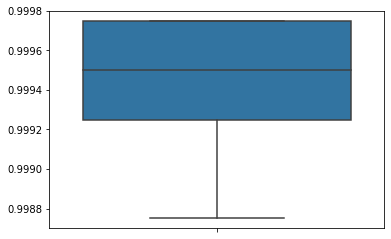

In [10]:
import seaborn as sns
sns.boxplot(y = scores)

### Dimensionality reduction

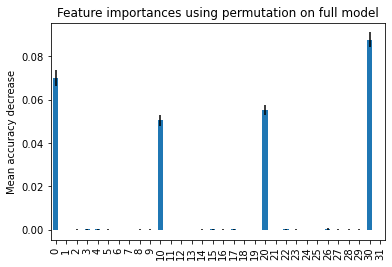

In [25]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
clf2 = RandomForestClassifier(random_state=1)
clf2.fit(X_train, y_train)

result = permutation_importance(
    clf2, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)


forest_importances = pd.Series(result.importances_mean)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
# fig.tight_layout()
plt.savefig("feature_importance_mixed.png")
plt.show()

In [12]:
most_important = forest_importances.sort_values(ascending=False)[0:4].index
reduced_df = df[most_important]

In [13]:
reduced_df

,30,0,20,10
0,0.018333,0.245802,0.729689,0.006176
1,0.650174,0.020670,0.047759,0.281397
2,0.008397,0.008397,0.491603,0.491603
3,0.675245,0.018756,0.256655,0.049345
4,0.422774,0.422774,0.077226,0.077226
...,...,...,...,...
19995,0.021314,0.716615,0.087491,0.174580
19996,0.000268,0.011590,0.988139,0.000003
19997,0.239433,0.239433,0.260567,0.260567
19998,0.301240,0.181330,0.147765,0.369665


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier(random_state=1)

X = reduced_df
y = df['entangled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [15]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.99925

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
scores

array([1.     , 1.     , 0.99975, 0.9995 , 0.9995 ])

<AxesSubplot:>

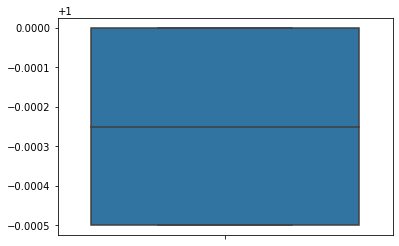

In [17]:
import seaborn as sns
sns.boxplot(y = scores)

In [45]:
(np.array(list(forest_importances.index))).reshape(4, -1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31]])